# Posthoc Analysis of IMAGEN:
The preliminary results in our IMAGEN paper advocates for a more in-depth understanding of what contributes to the significant performance of the ML models for the three time-points: <br>
<li>Baseline (<b>BL</b>): Age <tr> <b>14</b></li>
<li>Follow 1 year (<b>FU1</b>): Age <b>16</b></li>
<li>Follow 2 year (<b>FU2</b>): Age <b>19</b></li>
<li>Follow 3 year (<b>FU3</b>): Age <b>22</b></li>

<br>
Such in-depth understanding can be achieved by performing follow-up analysis:

In [1]:
import math
import time
import multiprocessing
from plot_results_posthoc import *

In [2]:
num_cores = multiprocessing.cpu_count()
print(f'Available CPU cores: {num_cores}')
num_cores = math.floor(num_cores/6)
print(f'Set CPU cores: {num_cores}')

Available CPU cores: 48
Set CPU cores: 8


In [3]:
DATA_DIR = "/ritter/share/data/IMAGEN"
SHAP = SHAP_visualization()

# 4. Visualization SHAP
## 4.1. SHAP values

### 4.1.1. Load the data and model

<b> Load the model </b>

In [4]:
MODELS = SHAP.get_model("../results/newlbls-fu3-espad-fu3-19a-binge-*/*/")

<b> Load the data </b>

In [5]:
train_dir = "/ritter/share/data/IMAGEN/h5files/newlbls-fu3-espad-fu3-19a-binge-n650.h5"
holdout_dir = "/ritter/share/data/IMAGEN/h5files/newholdout-fu3-espad-fu3-19a-binge-n102.h5"

# load the training data
tr_X, tr_X_col_names, tr_list = SHAP.get_train_data(train_dir, group=True)
print(f"Training dataset: {tr_X.shape}, {len(tr_X_col_names)}, {tr_list[0].shape}")
# load the holdout data
ho_X, ho_X_col_names, ho_list = SHAP.get_holdout_data(holdout_dir, group=True)
print(f"Holdout dataset: {ho_X.shape}, {len(ho_X_col_names)}, {ho_list[0].shape}")

<KeysViewHDF5 ['Binge', 'X', 'i', 'sex', 'site']> <KeysViewHDF5 ['X_col_names', 'confs', 'labels']>
Training dataset: (650, 723), 723, (650,)
<KeysViewHDF5 ['Binge', 'X', 'i', 'sex', 'site']> <KeysViewHDF5 ['X_col_names', 'confs', 'labels']>
Holdout dataset: (102, 723), 723, (102,)


<b> Get the SHAP input list </b>

In [6]:
# # DUMMY (N=3) FOR PLAYGROUND
# tr_X = tr_X[0:3]
# ho_X = ho_X[0:3]

In [7]:
# generate the SHAP input list of the training
tr_INPUT = SHAP.get_list(MODELS, tr_X)
# generate the SHAP input list of the holdout
ho_INPUT = SHAP.get_list(MODELS, ho_X)
print(f"Number of training set: {len(tr_INPUT)}\n\n" # , One example: {tr_INPUT[0:1]}\n\n"
      f"Number of holdout set: {len(ho_INPUT)}") # , One example: {tr_INPUT[0:1]}")

Number of training set: 28

Number of holdout set: 28


### 4.1.2. Get the shap value

<b> One by one

In [8]:
# One by one
INPUT = tr_INPUT[0]
start_time = time.time()
_ = SHAP.to_SHAP(INPUT)
print("--- %s seconds ---" % (time.time() - start_time))

Permutation explainer: 4it [00:19,  4.79s/it]               

--- 19.180795431137085 seconds ---


<b> Multi processing </b>

In [9]:
# Multi processing
INPUT = tr_INPUT[1:7]
start_time = time.time()
_ = parmap.map(SHAP.to_SHAP, INPUT, pm_pbar=True, pm_processes=num_cores)
print("--- %s seconds ---" % (time.time() - start_time))

Permutation explainer: 4it [00:15,  3.87s/it]               
Permutation explainer: 4it [00:15,  3.75s/it]               
100%|██████████| 6/6 [00:16<00:00,  2.76s/it]

--- 16.696764707565308 seconds ---


### 4.1.3. Get the plot

<b> Load the dataset </b>

In [10]:
with open('explainers/SVM-rbf0_holdout_shap.sav', 'rb') as fp:
    load_shap_values = pickle.load(fp)
if not os.path.isdir("figures"):
    os.makedirs("figures")

In [11]:
MODEL = ["SVM-RBF"]

<b> ROI 01: summary bar plot of feature importnace </b>

In [12]:
X = ho_X
X_col_names = ho_X_col_names

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


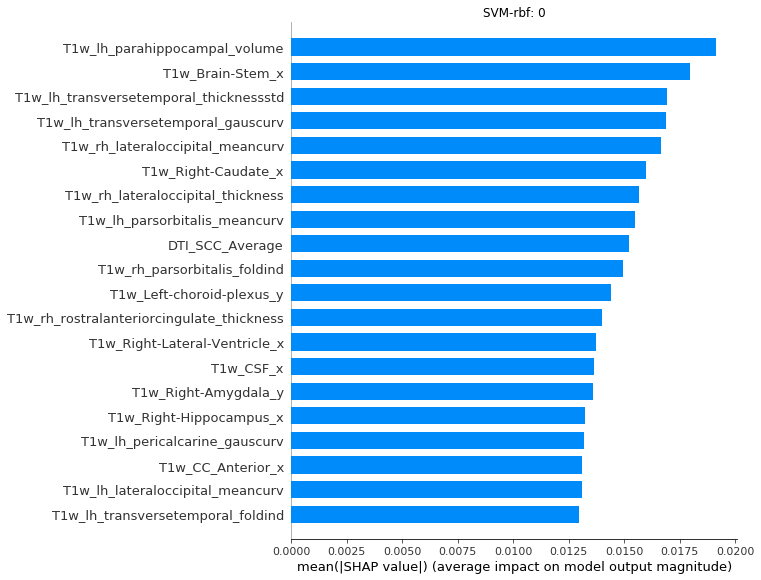

In [13]:
for model_name in MODELS:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(MODELS[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 1. summary bar plot of feature importnace
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="bar", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_bar.pdf", bbox_inches='tight')

<b> ROI 02: swarm plot showing shap values vs feature values ordered by feature importance </b>

In [14]:
X = ho_X
X_col_names = ho_X_col_names

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


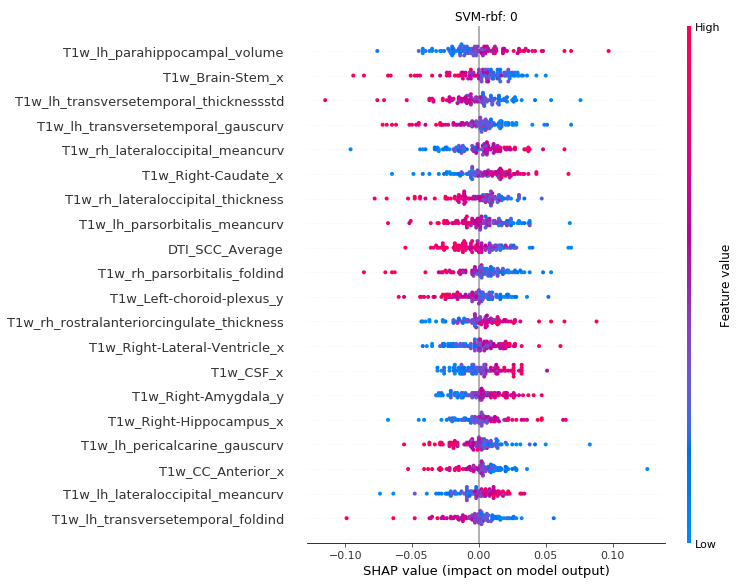

In [15]:
for model_name in MODELS:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(MODELS[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 2. swarm plot showing shap values vs feature values ordered by feature importance
            shap.summary_plot(load_shap_values, features=X, feature_names=X_col_names, plot_type="dot", show=False)
            plt.title(model_name+": "+str(i))
            plt.savefig(f"figures/{model_name}{i}_holdout_swarm.pdf", bbox_inches='tight')

<b> ROI 03: sex difference plot showing shap values vs feature values ordered by feature importance </b>

In [16]:
X_col_names = ho_X_col_names
sex_mask = ho_list[0].astype(bool)

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


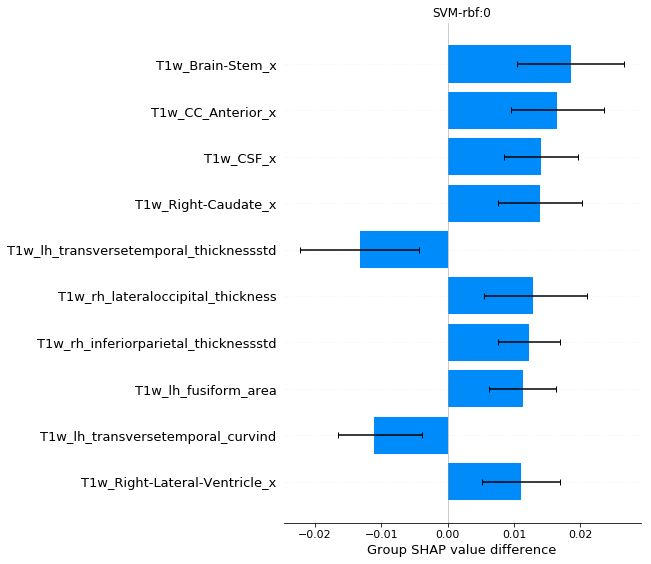

In [17]:
for model_name in MODELS:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(MODELS[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=sex_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-sexdiff.pdf", bbox_inches='tight')

<b> ROI 03: class difference plot showing shap values vs feature values ordered by feature importance </b>

In [18]:
X_col_names = ho_X_col_names
class_mask = ho_list[1].astype(bool)

skipping model GB
skipping model LR
skipping model SVM-lin
generating SHAP values for model = SVM-rbf ..
Skipping model 'SVM-rbf': 1' as it is taking too long
Skipping model 'SVM-rbf': 2' as it is taking too long
Skipping model 'SVM-rbf': 3' as it is taking too long
Skipping model 'SVM-rbf': 4' as it is taking too long
Skipping model 'SVM-rbf': 5' as it is taking too long
Skipping model 'SVM-rbf': 6' as it is taking too long


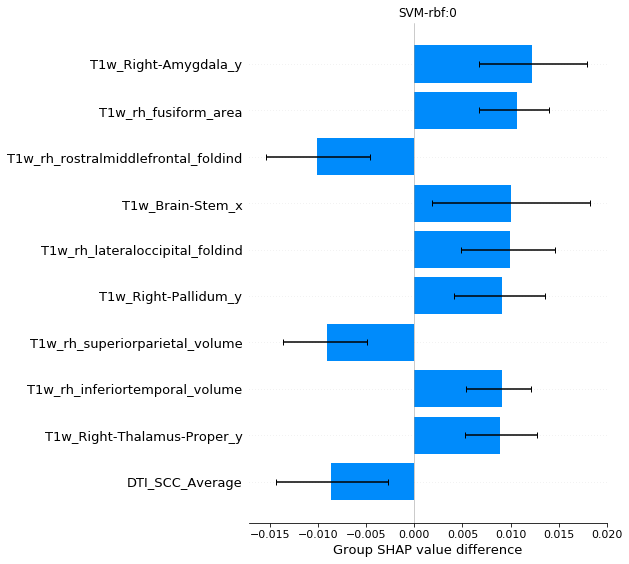

In [19]:
for model_name in MODELS:
    if ( model_name.upper() not in MODEL):
        print("skipping model {}".format(model_name))
        continue
    print("generating SHAP values for model = {} ..".format(model_name))
    for i, model in enumerate(MODELS[model_name]):
        if i!=0:
            print("Skipping model '{}': {}' as it is taking too long".format(model_name, i))
            continue
        if i==0:
            # 3. sex difference plot
            shap.group_difference_plot(load_shap_values.values, group_mask=class_mask, feature_names=X_col_names, show=False, max_display=10)
            plt.title(model_name+":"+str(i))
            # plt.savefig("figrues/{}_bar-sexdiff.pdf".format(model_name+str(i)), bbox_inches='tight')
            plt.savefig(f"figures/{model_name}{i}_holdout_bar-classdiff.pdf", bbox_inches='tight')